# Predict Customer is Exited or Not with Python and Machine Learning

In this project we will be building a model that Predicts customer churn with Machine Learning. We do this by implementing a predictive model with the help of python.
Prediction of Customer Churn means our beloved customers with the intention of leaving us in the future.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from termcolor import colored as cl # text customization
import itertools # advanced tools
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv(r"C:\Users\user\DATA SCIENCE\Z- New Resume Projects\customer churn prediction\Churn_Modelling.csv")
customer_df 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Now we see the column and rows**

In [3]:
customer_df.shape

(10000, 14)

**Now we see the column name**

In [4]:
customer_df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

**To check for NA or missing values**

In [5]:
customer_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**To show some statistics**

In [6]:
customer_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Now we get Customer Churn count**

In [7]:
Churn = customer_df['Exited'].value_counts()

print(cl('Customer_churn [1]:Yes & [0]:No', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(Churn)
print(cl('--------------------------------------------', attrs = ['bold']))

Customer_churn [1]:Yes & [0]:No
--------------------------------------------
0    7963
1    2037
Name: Exited, dtype: int64
--------------------------------------------


**Exploratory Data Analysis**

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

**To see the percentage of customers that are leaving**

In [9]:
Retained_number = customer_df[customer_df.Exited == 0].shape[0]
Churned_number = customer_df[customer_df.Exited == 1].shape[0]

# print the percentage of customers that stayed
print(Retained_number/(Retained_number + Churned_number) * 100,'% of customers stayed in the company')

# print the percentage of customers that left
print(Churned_number/(Retained_number + Churned_number) * 100, '% of customers left with the company')

79.63 % of customers stayed in the company
20.369999999999997 % of customers left with the company


**Visualize the Exited count for both males and females**

Text(0.5, 1.0, 'Exited With Respected to Gender')

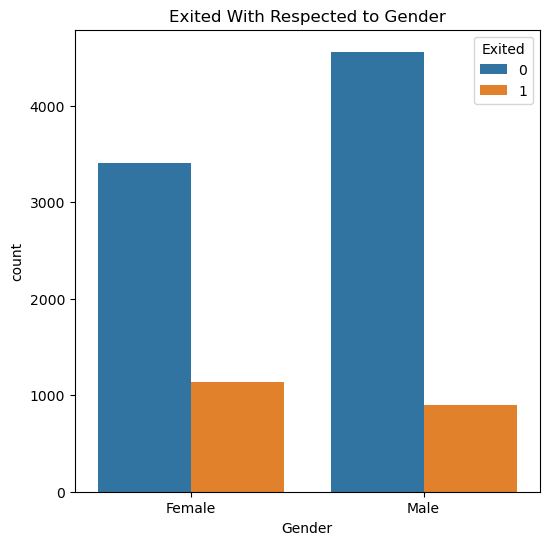

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Gender', hue='Exited', data=customer_df)
plt.title("Exited With Respected to Gender")

**Visualize the Exited count for the internet service**

Text(0.5, 1.0, 'Exited With Respected to Internet_Service')

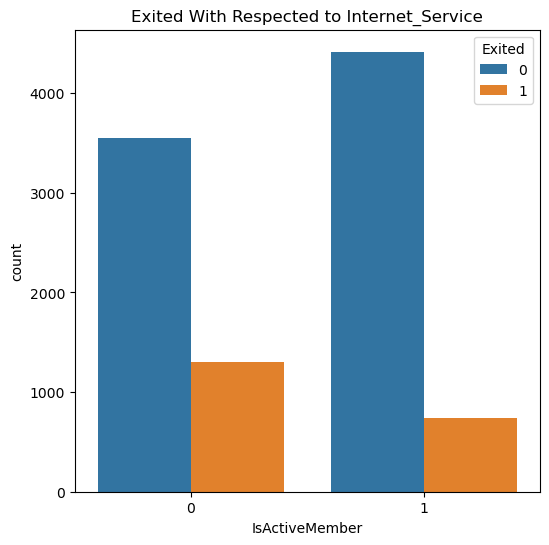

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='IsActiveMember', hue='Exited', data=customer_df)
plt.title("Exited With Respected to Internet_Service")

**Visualize the Exited count for creditcard**

Text(0.5, 1.0, 'Exited With Respected to Credit_Card')

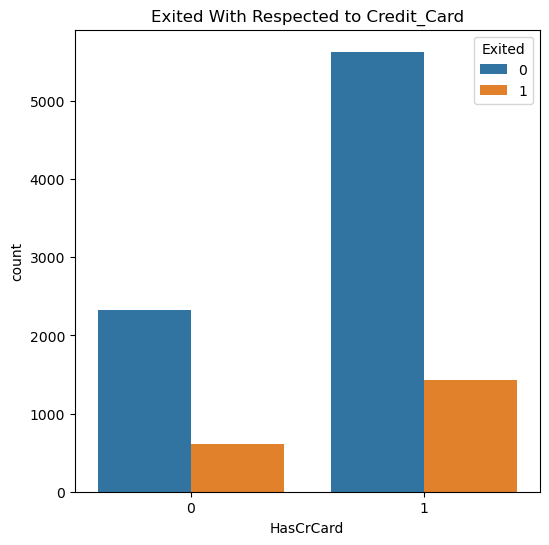

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='HasCrCard', hue='Exited', data=customer_df)
plt.title("Exited With Respected to Credit_Card")

In [13]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Now we Visualize the relation between Exited variable and Categorical variable data**

<Axes: xlabel='IsActiveMember', ylabel='count'>

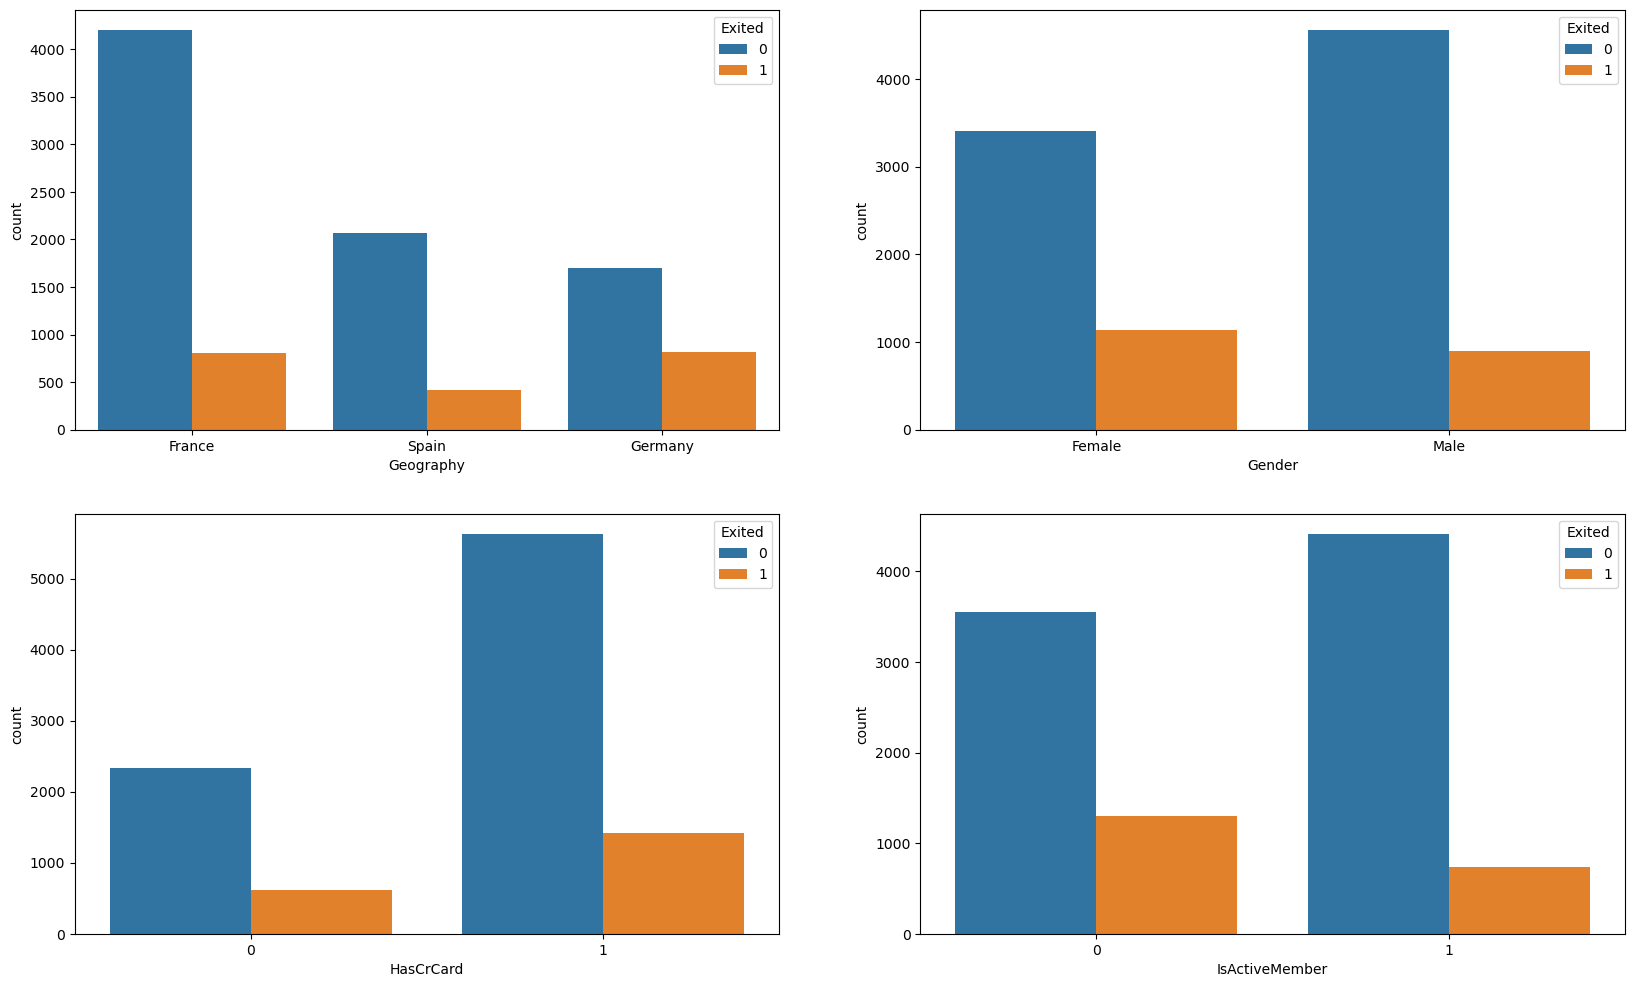

In [15]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = customer_df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = customer_df, ax=axarr[0][1])

sns.countplot(x='HasCrCard', hue = 'Exited',data = customer_df, ax=axarr[1][0])

sns.countplot(x='IsActiveMember', hue = 'Exited',data = customer_df, ax=axarr[1][1])

**We note the following:**

- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
- The proportion of female customers churning is also greater than that of male customers
- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

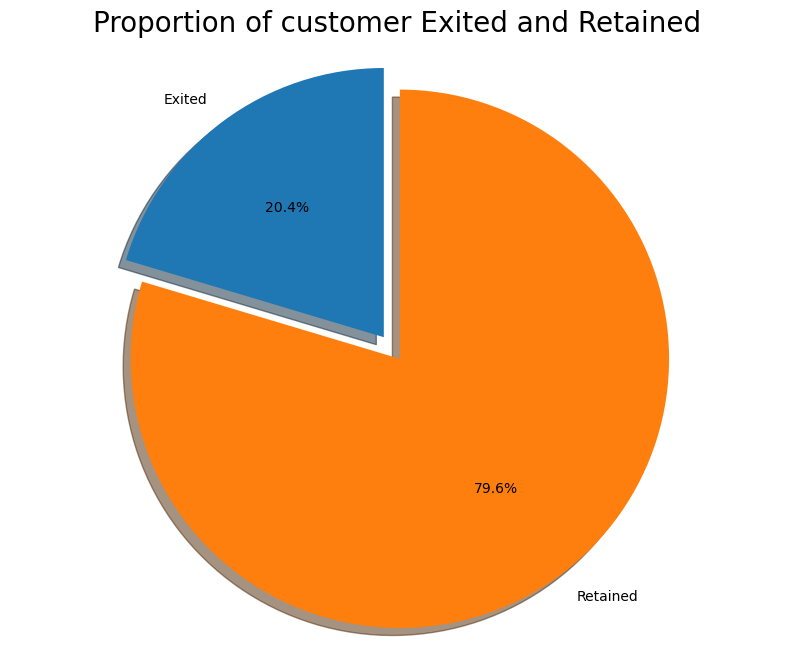

In [14]:
labels = 'Exited', 'Retained'
sizes = [customer_df.Exited[customer_df['Exited']==1].count(), customer_df.Exited[customer_df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Exited and Retained", size = 20)
plt.show()

# Conclusion

**Out of all the customers, approximately 20.4% have churned. Therefore, a baseline model could simply predict that 20% of the customers will churn. Since 20.4% is a relatively small number, it is crucial to ensure that the chosen model accurately predicts this specific group. It is of great importance to the bank to identify and retain these customers who are likely to churn, rather than focusing on accurately predicting the customers who will remain with the bank.**